# 百货商店客户细分


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 流水数据


In [2]:
# 读数据
sales = pd.read_csv('data/sales.csv', encoding='utf-8')
sales

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\2579366754.py:2: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('data/sales.csv', encoding='utf-8')


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜
...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,c483e08b,1,200.0,200.00,植村秀眉笔4g,200.00,91,3d84,8156.0,Shu Uemura
1893528,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,1.0,1.00,爱慕内衣正价件,1.00,264,7cd8,4332.0,Aimer
1893529,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,490.0,490.00,爱慕内衣正价件,490.00,264,7cd8,4332.0,Aimer
1893530,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,280.0,280.00,爱慕内衣正价件,280.00,264,7cd8,4332.0,Aimer


In [3]:
# 把时间转换成时间格式
sales['消费产生的时间'] = pd.to_datetime(sales['消费产生的时间'])

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893532 entries, 0 to 1893531
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   会员卡号       object        
 1   消费产生的时间    datetime64[ns]
 2   商品编码       object        
 3   销售数量       int64         
 4   商品售价       float64       
 5   消费金额       float64       
 6   商品名称       object        
 7   此次消费的会员积分  float64       
 8   收银机号       int64         
 9   单据号        object        
 10  柜组编码       float64       
 11  柜组名称       object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 173.4+ MB


## 会员信息


In [5]:
# 会员信息
userinfo = pd.read_excel('data/userinfo.xlsx',parse_dates=['出生日期','登记时间'])
userinfo

,会员卡号,出生日期,性别,登记时间
0,c68b20b4,2002-11-02 00:00:00,0.0,2013-05-11 00:00:00.000
1,1ca15332,NaN,0.0,2004-11-04 16:31:52.436
2,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216
3,2ab88539,1982-06-01 00:00:00,0.0,2010-11-19 00:00:00.000
4,b4c77269,1964-02-05 00:00:00,0.0,2007-12-14 00:00:00.000
...,...,...,...,...
194755,a97474e0,NaN,NaN,NaT
194756,4e14ad22,NaN,0.0,2013-08-30 00:00:00.000
194757,f20299a8,NaN,NaN,2014-03-18 00:00:00.000
194758,a3a27f12,1973-01-10 00:00:00,0.0,2015-03-10 00:00:00.000


In [6]:
# 日期处理
userinfo['出生日期'] = pd.to_datetime(userinfo['出生日期'], errors='coerce')

In [7]:
userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194760 entries, 0 to 194759
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    194760 non-null  object        
 1   出生日期    160553 non-null  datetime64[ns]
 2   性别      185325 non-null  float64       
 3   登记时间    182076 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 5.9+ MB


## 清洗会员数据


### 存在部分会员登记时间早于会员出生时间


In [8]:
# 提取出生日期大于登记日期的数据
time1=(userinfo['登记时间']-userinfo['出生日期']).dt.days
part1_user = userinfo.loc[time1>0,:]
part1_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154163 entries, 0 to 194759
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    154163 non-null  object        
 1   出生日期    154163 non-null  datetime64[ns]
 2   性别      153176 non-null  float64       
 3   登记时间    154163 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 5.9+ MB


### 存在缺失值

In [9]:
part1_user.dropna(inplace=True)

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\1540930359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1_user.dropna(inplace=True)


### 删除重复会员

In [10]:
part1_user.drop_duplicates(inplace=True)

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\741189198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1_user.drop_duplicates(inplace=True)


In [11]:
part1_user.shape

(153176, 4)

## 清洗流水数据

### 删除退货订单

In [12]:
# 删除销售数量为0的数据
sales = sales.loc[sales['销售数量']>0,:]
sales

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜
...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,c483e08b,1,200.0,200.00,植村秀眉笔4g,200.00,91,3d84,8156.0,Shu Uemura
1893528,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,1.0,1.00,爱慕内衣正价件,1.00,264,7cd8,4332.0,Aimer
1893529,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,490.0,490.00,爱慕内衣正价件,490.00,264,7cd8,4332.0,Aimer
1893530,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,280.0,280.00,爱慕内衣正价件,280.00,264,7cd8,4332.0,Aimer


### 删除消费金额不为正的订单

In [13]:
sales = sales.loc[sales['消费金额']>0,:]
sales

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜
...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,c483e08b,1,200.0,200.00,植村秀眉笔4g,200.00,91,3d84,8156.0,Shu Uemura
1893528,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,1.0,1.00,爱慕内衣正价件,1.00,264,7cd8,4332.0,Aimer
1893529,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,490.0,490.00,爱慕内衣正价件,490.00,264,7cd8,4332.0,Aimer
1893530,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,280.0,280.00,爱慕内衣正价件,280.00,264,7cd8,4332.0,Aimer


## 合并数据

In [14]:
data = pd.merge(sales,part1_user,how='outer',on='会员卡号')
data

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,290.0,270.20,兰芝化妆品正价瓶,270.20,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,325.0,302.80,兰芝化妆品正价瓶,302.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,195.0,181.80,兰芝化妆品正价瓶,181.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,270.0,251.55,兰芝化妆品正价瓶,251.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2.0,245.0,456.55,兰芝化妆品正价瓶,456.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973746,9e7c711e,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-06-24,1.0,2013-08-30
1973747,5b7c99c6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-04-23,1.0,2010-06-14
1973748,3f98ac2e,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-03-02,1.0,2013-08-30
1973749,a3a27f12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973-01-10,0.0,2015-03-10


## 删除空数据

In [15]:
# 提取会员数据
vip = data[data['会员卡号'].notnull()]
vip

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,290.0,270.20,兰芝化妆品正价瓶,270.20,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,325.0,302.80,兰芝化妆品正价瓶,302.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,195.0,181.80,兰芝化妆品正价瓶,181.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,270.0,251.55,兰芝化妆品正价瓶,251.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2.0,245.0,456.55,兰芝化妆品正价瓶,456.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973746,9e7c711e,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-06-24,1.0,2013-08-30
1973747,5b7c99c6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-04-23,1.0,2010-06-14
1973748,3f98ac2e,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-03-02,1.0,2013-08-30
1973749,a3a27f12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973-01-10,0.0,2015-03-10


In [16]:
# 删除没有消费的会员数据
Vip_data = vip.dropna()
Vip_data

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733


## 数据暂存

## 学习分箱

<AxesSubplot:ylabel='年龄段'>

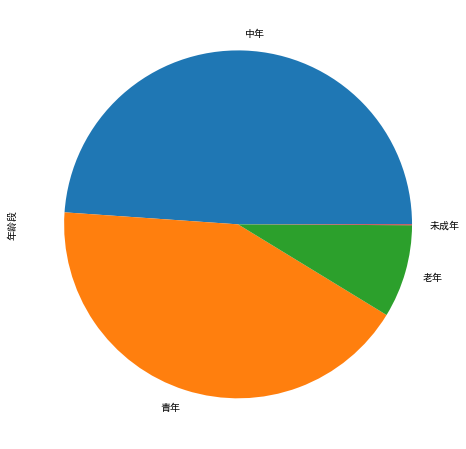

In [17]:
today = pd.Timestamp(year=2023,month=2,day=22)
# 第一：计算年龄
data['年龄'] = (today - data['出生日期']).dt.days/365
# 第二：指定区间进行分箱
labels =['未成年','青年','中年','老年']
bins = [0,22,45,60,100]
data['年龄段'] = pd.cut(data['年龄'],bins=bins,labels=labels)
ans = data['年龄段'].value_counts()
plt.figure(figsize=(8,8),facecolor='white')
ans.plot.pie()
# 第三：借助 map，映射成中文信息放到数据中

## 特征工程

### L：入会时长

In [18]:
Vip_data['入会时长'] = (Vip_data['登记时间'].max()-Vip_data['登记时间']).dt.days
Vip_data

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\2689619908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vip_data['入会时长'] = (Vip_data['登记时间'].max()-Vip_data['登记时间']).dt.days


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,入会时长
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746,9
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000,1106
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0


### R：最近一次消费距今时长

#### 第一种方法

In [19]:
ans = Vip_data[{'会员卡号','消费产生的时间'}].groupby('会员卡号').max() # 最后一次时间的提取 
ans = ans.max()-ans # 计算时间间隔
ans['最近一次消费距今时长'] = ans['消费产生的时间'].dt.days # 提取天数
Vip_data1 = pd.merge(Vip_data,ans,left_on='会员卡号',right_index=True,how='left')
Vip_data1

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\23668682.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ans = Vip_data[{'会员卡号','消费产生的时间'}].groupby('会员卡号').max() # 最后一次时间的提取


,会员卡号,消费产生的时间_x,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,入会时长,消费产生的时间_y,最近一次消费距今时长
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,280 days 09:12:49.140000,280
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,280 days 09:12:49.140000,280
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,280 days 09:12:49.140000,280
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,280 days 09:12:49.140000,280
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,280 days 09:12:49.140000,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746,9,0 days 00:02:12.450000,0
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000,1106,0 days 00:54:38.686000,0
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0 days 00:18:30.623000,0
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0 days 00:18:30.623000,0


#### 第二种方法

In [20]:
# 计算消费时间
Vip_data['消费时长'] = (Vip_data['消费产生的时间'].max()-Vip_data['消费产生的时间']).dt.days
ans2 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').min()
ans2.columns = ['最近一次消费距今时长']
Vip_data2 = pd.merge(Vip_data,ans2,left_on='会员卡号',right_index=True,how='left')
Vip_data2

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\3137829464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vip_data['消费时长'] = (Vip_data['消费产生的时间'].max()-Vip_data['消费产生的时间']).dt.days
C:\Users\31815\AppData\Local\Temp\ipykernel_27948\3137829464.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ans2 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').min()


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,入会时长,消费时长,最近一次消费距今时长
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746,9,0,0
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000,1106,0,0
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0


### M：用户花费的总金额

In [21]:
ans3 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').sum()
ans3.columns = ['消费总金额']
Vip_data3 = pd.merge(Vip_data2,ans3,left_on='会员卡号',right_index=True,how='left')
Vip_data3

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\899608057.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ans3 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').sum()


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,入会时长,消费时长,最近一次消费距今时长,消费总金额
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746,9,0,0,0
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000,1106,0,0,0
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0,0
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0,0


### F：用户消费的总次数

In [22]:
ans4 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').count()
ans4.columns = ['消费次数']
Vip_data4 = pd.merge(Vip_data3,ans4,left_on='会员卡号',right_index=True,how='left')
Vip_data4

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\3401184488.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ans4 = Vip_data[{'会员卡号','消费时长'}].groupby('会员卡号').count()


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,入会时长,消费时长,最近一次消费距今时长,消费总金额,消费次数
301,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089,43
302,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,9072.0,9072.0,MARYLINGC件,8653.56,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089,43
303,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,1507.0,1507.0,汤普葛罗女鞋活动促销双,1437.49,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089,43
304,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,8131.0,TOP柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089,43
305,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1960.0,1960.0,MARYLINGC件,1869.59,10.0,5858,2273.0,MARYLING 柜,1973-10-25,0.0,2007-08-12 00:00:00.000,3797,1098,280,38089,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861290,826ea280,2018-01-03 21:25:16.236,2c276195,1.0,399.0,399.0,芭芭麻麻正价件,399.00,205.0,fcd0,2337.0,芭芭麻麻,1985-02-01,0.0,2017-12-25 19:30:50.746,9,0,0,0,5
1861291,dd018e94,2018-01-03 20:32:50.000,84c0c98a,1.0,1679.0,1679.0,MO&CO.EDIFIONC件,1679.00,224.0,7cd8,3264.0,MO&CO.EDITION柜,1989-05-20,0.0,2014-12-24 00:00:00.000,1106,0,0,0,1
1861292,69de49e9,2018-01-03 21:08:58.063,88111139,1.0,560.0,560.0,科颜氏高保湿面霜125ml,560.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0,0,3
1861293,69de49e9,2018-01-03 21:08:58.063,4e727693,1.0,640.0,640.0,科颜氏丰润保湿精华乳.,640.00,102.0,2d09,8186.0,科颜氏(Kiehl's),1988-01-04,0.0,2018-01-03 20:41:57.733,0,0,0,0,3


## 提取数据

In [23]:
Vip_data4.columns

Index(['会员卡号', '消费产生的时间', '商品编码', '销售数量', '商品售价', '消费金额', '商品名称', '此次消费的会员积分',
       '收银机号', '单据号', '柜组编码', '柜组名称', '出生日期', '性别', '登记时间', '入会时长', '消费时长',
       '最近一次消费距今时长', '消费总金额', '消费次数'],
      dtype='object')

In [26]:
feature = Vip_data4[{'入会时长','最近一次消费距今时长','消费总金额','消费次数'}]


C:\Users\31815\AppData\Local\Temp\ipykernel_27948\3713955667.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  feature = Vip_data4[{'入会时长','最近一次消费距今时长','消费总金额','消费次数'}]


## 去重

In [27]:
feature.drop_duplicates(inplace=True)

C:\Users\31815\AppData\Local\Temp\ipykernel_27948\243443446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop_duplicates(inplace=True)


## 聚类

In [28]:
feature.describe()

,最近一次消费距今时长,入会时长,消费总金额,消费次数
count,35382.000000,35382.000000,35382.000000,35382.000000
mean,397.271974,1525.058843,5836.257871,12.244107
std,355.167732,1172.694722,12152.516467,30.048698
min,0.000000,0.000000,0.000000,1.000000
25%,84.000000,550.000000,895.250000,2.000000
50%,297.000000,1194.000000,2106.500000,5.000000
75%,624.000000,2348.000000,5765.250000,12.000000
max,1098.000000,5550.000000,444255.000000,3007.000000


### 标准化

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_N = sc.fit_transform(feature)

### 聚类

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(feature_N)
model.labels_

array([2, 0, 0, ..., 1, 1, 1])

In [31]:
model.cluster_centers_ # 得到是聚类中心

array([[ 1.05161079,  0.6527434 , -0.16027278, -0.24778705],
       [-0.56304764, -0.36988732, -0.1249585 , -0.0425195 ],
       [-0.85791236, -0.15725375,  4.00807607,  3.42489639]])

## 根据评价指标优化聚类数

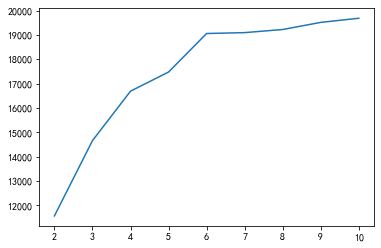

In [32]:
from sklearn.metrics import calinski_harabasz_score
csdata = []
for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(feature_N)
    cs = calinski_harabasz_score(feature_N,model.labels_)
    csdata.append(cs)
plt.plot(range(2,11),csdata)

## 聚类结果可视化

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(feature_N)
model.labels_ 

array([2, 1, 1, ..., 0, 0, 0])

## Pyecharts

In [ ]:
from pyecharts import *
from pyecharts import options as opts
# 导入聚类数据